## Things to all in this md

- [ ] Calling Comparison APIs
- [ ] Test Set Data to compare apis
- [ ] Select metrics that should me used to compare APIs
- [ ] Create list of metrics and visualizatinos needed to make this a nice presentable Notebook.

In [2]:
from corpus_based.sent_sim import CorpusBasedComparision
from sent_bert.sent_sim_bert import MultiSentenceBertComparision

In [3]:
CorpusBasedComparision("nice day", "bad dog")

0.20143834189646437

In [4]:
MultiSentenceBertComparision(["Nice Day"],["Nice time","good time","Nice day","bad dog"])

[[0.7998412847518921, 0.691921591758728, 1.000000238418579, 0.135232076048851]]

In [5]:
from data.read_tsv import read_file

In [6]:
parsed_data = read_file("./data/sick_data.tsv")

In [7]:
# for i in range(1,10):
#     s1, s2, ex = parsed_data[i][1],parsed_data[i][2], parsed_data[i][0]
#     print( ex , 
#           CorpusBasedComparision(s1,s2)*5 ,
#           float(MultiSentenceBertComparision([s1],[s2])[0][0])*5,
#           s1, s2, "" , sep="\n")
#     print()

## list

- accuacy, precision
- error
- deviation
- r2 error
- FP-TN ( DA COURSE LAST SLIDES )
- biases ( corpus stats (word order ) )

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [9]:
def MSE(result):
    result = np.array([ (a-b)**2 for a,b in result])
    return np.mean(result)

In [10]:
def real_computed(res):
    return [item[0] for item in res] , [item[1] for item in res]

In [11]:
def std_dev(arr):
    arr = np.array(arr)
    return np.std(arr)

## For Corpus Based Method

In [12]:
%%time
results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:5]):
    if ind%10 == 0 : print(ind, end=".")
    results.append([ float(comp)/5 , CorpusBasedComparision(s1,s2) ])

0.CPU times: user 1.02 s, sys: 36 ms, total: 1.05 s
Wall time: 1.05 s


In [13]:
MSE(results)

0.01660042162862302

In [14]:
real , computed = real_computed(results)

In [15]:
real_std , computed_std = std_dev(real) , std_dev(computed)
print(real_std, computed_std)

0.15512575543732257 0.17164461993635002


In [16]:
## Spearman Rank Correlation

## For SentBERT

In [17]:
%%time
sentbert_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:5]):
    if ind%10 == 0 : print(ind, end=".")
    comp_val = MultiSentenceBertComparision( [ s1 ] , [s2] )[0][0]
    sentbert_results.append([ float(comp)/5 , comp_val ])

0.CPU times: user 837 ms, sys: 6.22 ms, total: 843 ms
Wall time: 223 ms


In [18]:
MSE(sentbert_results)

0.014841505463223159

In [19]:
real , computed = real_computed(sentbert_results)

In [20]:
real_std , computed_std = std_dev(real) , std_dev(computed)
print(real_std, computed_std)

0.15512575543732257 0.12486256609890857


In [21]:
## Spearman Rank Correlation

## Time and Accuracy analysis

In [37]:
input_size = [10, 50, 100, 150, 200, 250, 300, 350, 400]
MSE_for_corpus = []
diff_in_std_for_corpus = []
time_for_corpus = []
time_for_SBERT = []
MSE_for_SBERT = []
diff_in_std_for_SBERT = []

total_size = 402

print("---- for Corpuse Base Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_corpus.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_corpus.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_corpus.append( time.time()-time_start )
    if ind%10 == 0 : print(ind, end=".")
    corpus_results.append([ float(comp)/5 , CorpusBasedComparision(s1,s2) ])
    

print("\n---- for SBERT Approach ------")

time_start = time.time()
corpus_results = []
for ind , (comp, s1, s2) in enumerate(parsed_data[:total_size]):
    if ind in input_size:
        MSE_for_SBERT.append( MSE(corpus_results) )
        r,c = real_computed(corpus_results)
        diff_in_std_for_SBERT.append( abs( std_dev(r) - std_dev(c) ) )
        time_for_SBERT.append( time.time()-time_start )
    if ind%10 == 0 : print(ind, end=".")
    comp_val = MultiSentenceBertComparision( [ s1 ] , [s2] )[0][0]
    corpus_results.append([ float(comp)/5 , comp_val ])

---- for Corpuse Base Approach ------
0.10.20.30.40.50.60.70.80.90.100.110.120.130.140.150.160.170.180.190.200.210.220.230.240.250.260.270.280.290.300.310.320.330.340.350.360.370.380.390.400.
---- for SBERT Approach ------
0.10.20.30.40.50.60.70.80.90.100.110.120.130.140.150.160.170.180.190.200.210.220.230.240.250.260.270.280.290.300.310.320.330.340.350.360.370.380.390.400.

In [49]:
size = len(input_size)

print("for Corpuse Base Approach")
for i in range(size):
    print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
        input_size[i] , MSE_for_corpus[i], diff_in_std_for_corpus[i], time_for_corpus[i]
    ))

print("\nfor SBERT Approach")
for i in range(size):
    print("size: {} , MSE: {}, std_difference: {}, time_taken: {}".format(
        input_size[i] , MSE_for_SBERT[i], diff_in_std_for_SBERT[i], time_for_SBERT[i]
    ))


for Corpuse Base Approach
size: 10 , MSE: 0.025171167463397214, std_difference: 0.03943130026599653, time_taken: 1.6417615413665771
size: 50 , MSE: 0.06896495886997368, std_difference: 0.11784172937796134, time_taken: 9.610848665237427
size: 100 , MSE: 0.0802712689244626, std_difference: 0.09333024566768078, time_taken: 17.555699348449707
size: 150 , MSE: 0.07709368152607982, std_difference: 0.09325371032994093, time_taken: 27.620099782943726
size: 200 , MSE: 0.0756698539453927, std_difference: 0.09980569465560588, time_taken: 39.669124603271484
size: 250 , MSE: 0.07500765396291223, std_difference: 0.09725418304756808, time_taken: 51.68587398529053
size: 300 , MSE: 0.07463817899710494, std_difference: 0.09521870523405318, time_taken: 60.8977472782135
size: 350 , MSE: 0.07233800639556993, std_difference: 0.09537198077870879, time_taken: 69.31845307350159
size: 400 , MSE: 0.0706958791563069, std_difference: 0.09339767409882291, time_taken: 78.12648487091064

for SBERT Approach
size: 10 ,

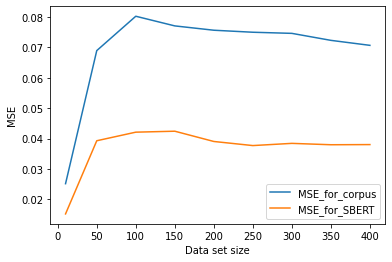

In [46]:
plt.plot( input_size , MSE_for_corpus,label="MSE_for_corpus")
plt.plot( input_size , MSE_for_SBERT ,label="MSE_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("MSE")
plt.show()

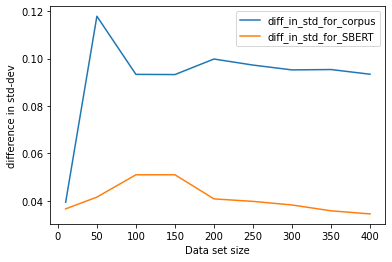

In [47]:
plt.plot( input_size , diff_in_std_for_corpus,label="diff_in_std_for_corpus")
plt.plot( input_size , diff_in_std_for_SBERT ,label="diff_in_std_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("difference in std-dev")
plt.show()

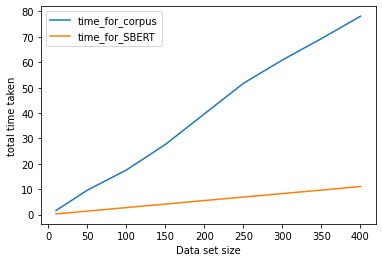

In [48]:
plt.plot( input_size , time_for_corpus,label="time_for_corpus")
plt.plot( input_size , time_for_SBERT ,label="time_for_SBERT")
plt.legend()
plt.xlabel("Data set size")
plt.ylabel("total time taken")
plt.show()